In [1]:
!nvidia-smi

Fri Jul 12 10:12:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 10.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/car

/content/drive/MyDrive/car


In [7]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8n.pt


In [8]:
from ultralytics import YOLO

In [9]:
!pwd

/content/drive/MyDrive/car


In [10]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

In [11]:
!ls runs/detect/train/

args.yaml					    labels.jpg	      train_batch2.jpg
events.out.tfevents.1720778480.f1d60bdf610b.2068.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


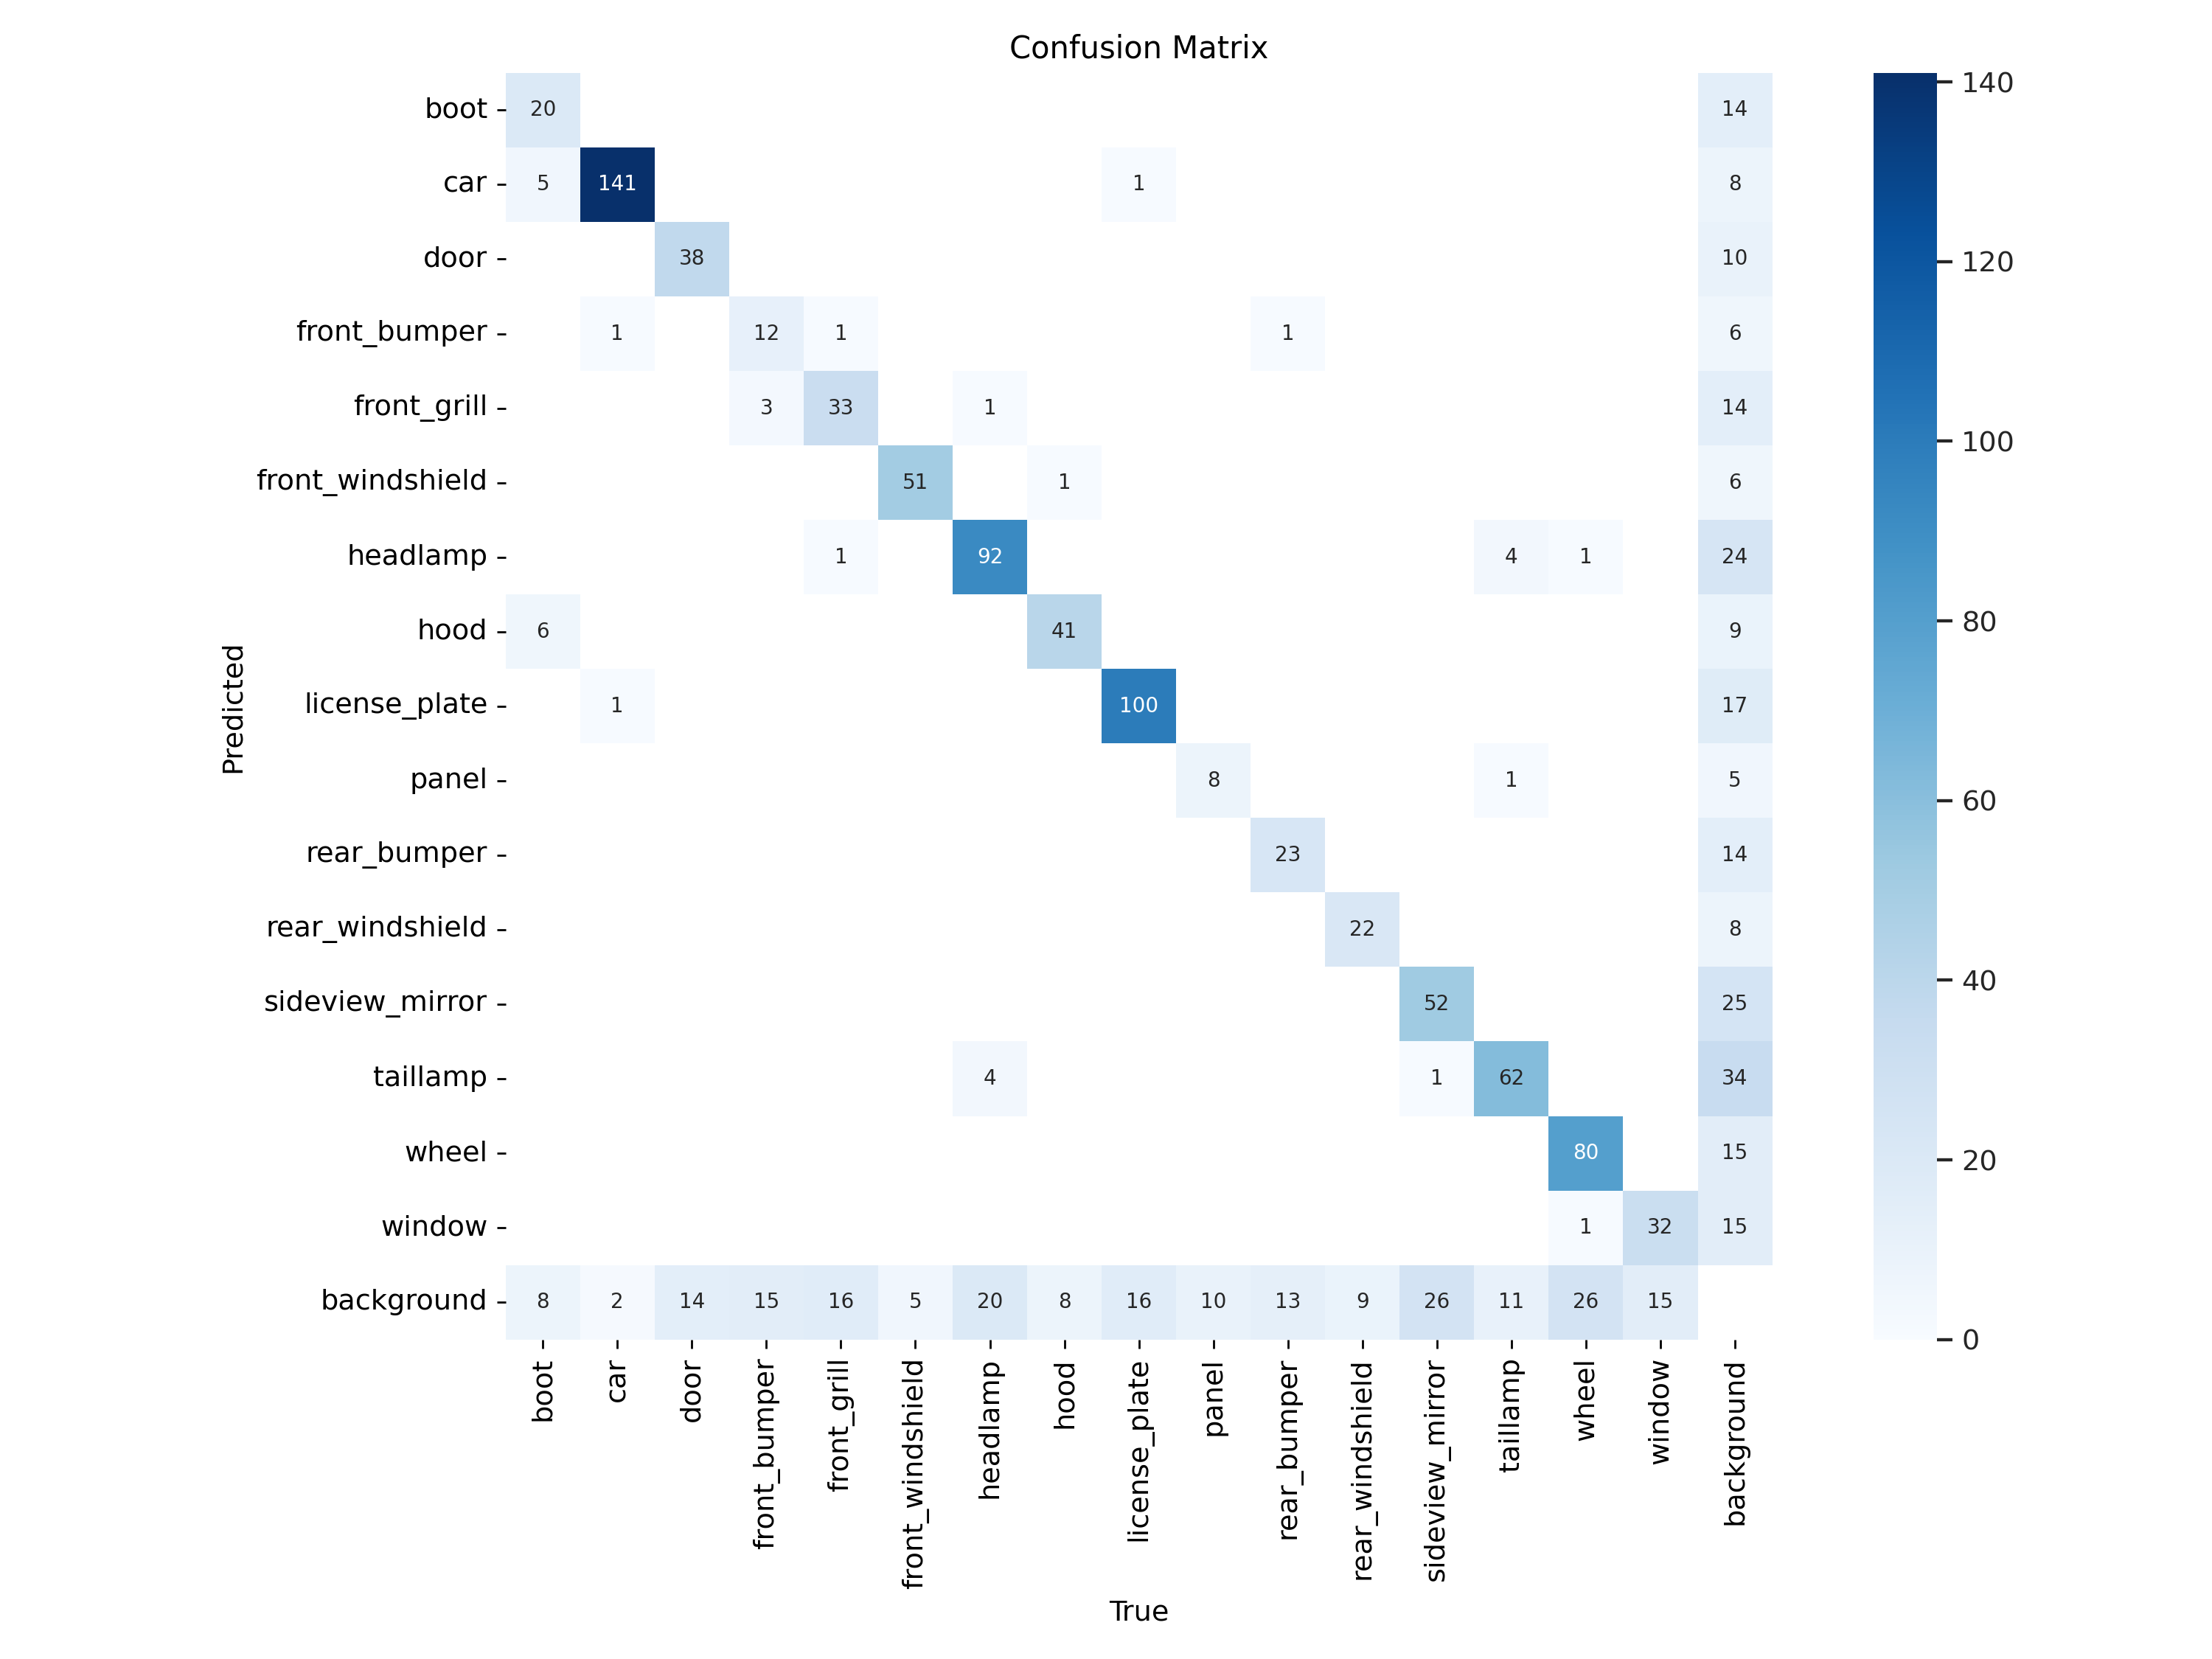

In [13]:
from IPython.display import display, Image
Image(filename='runs/detect/train2/confusion_matrix.png', width=1000)

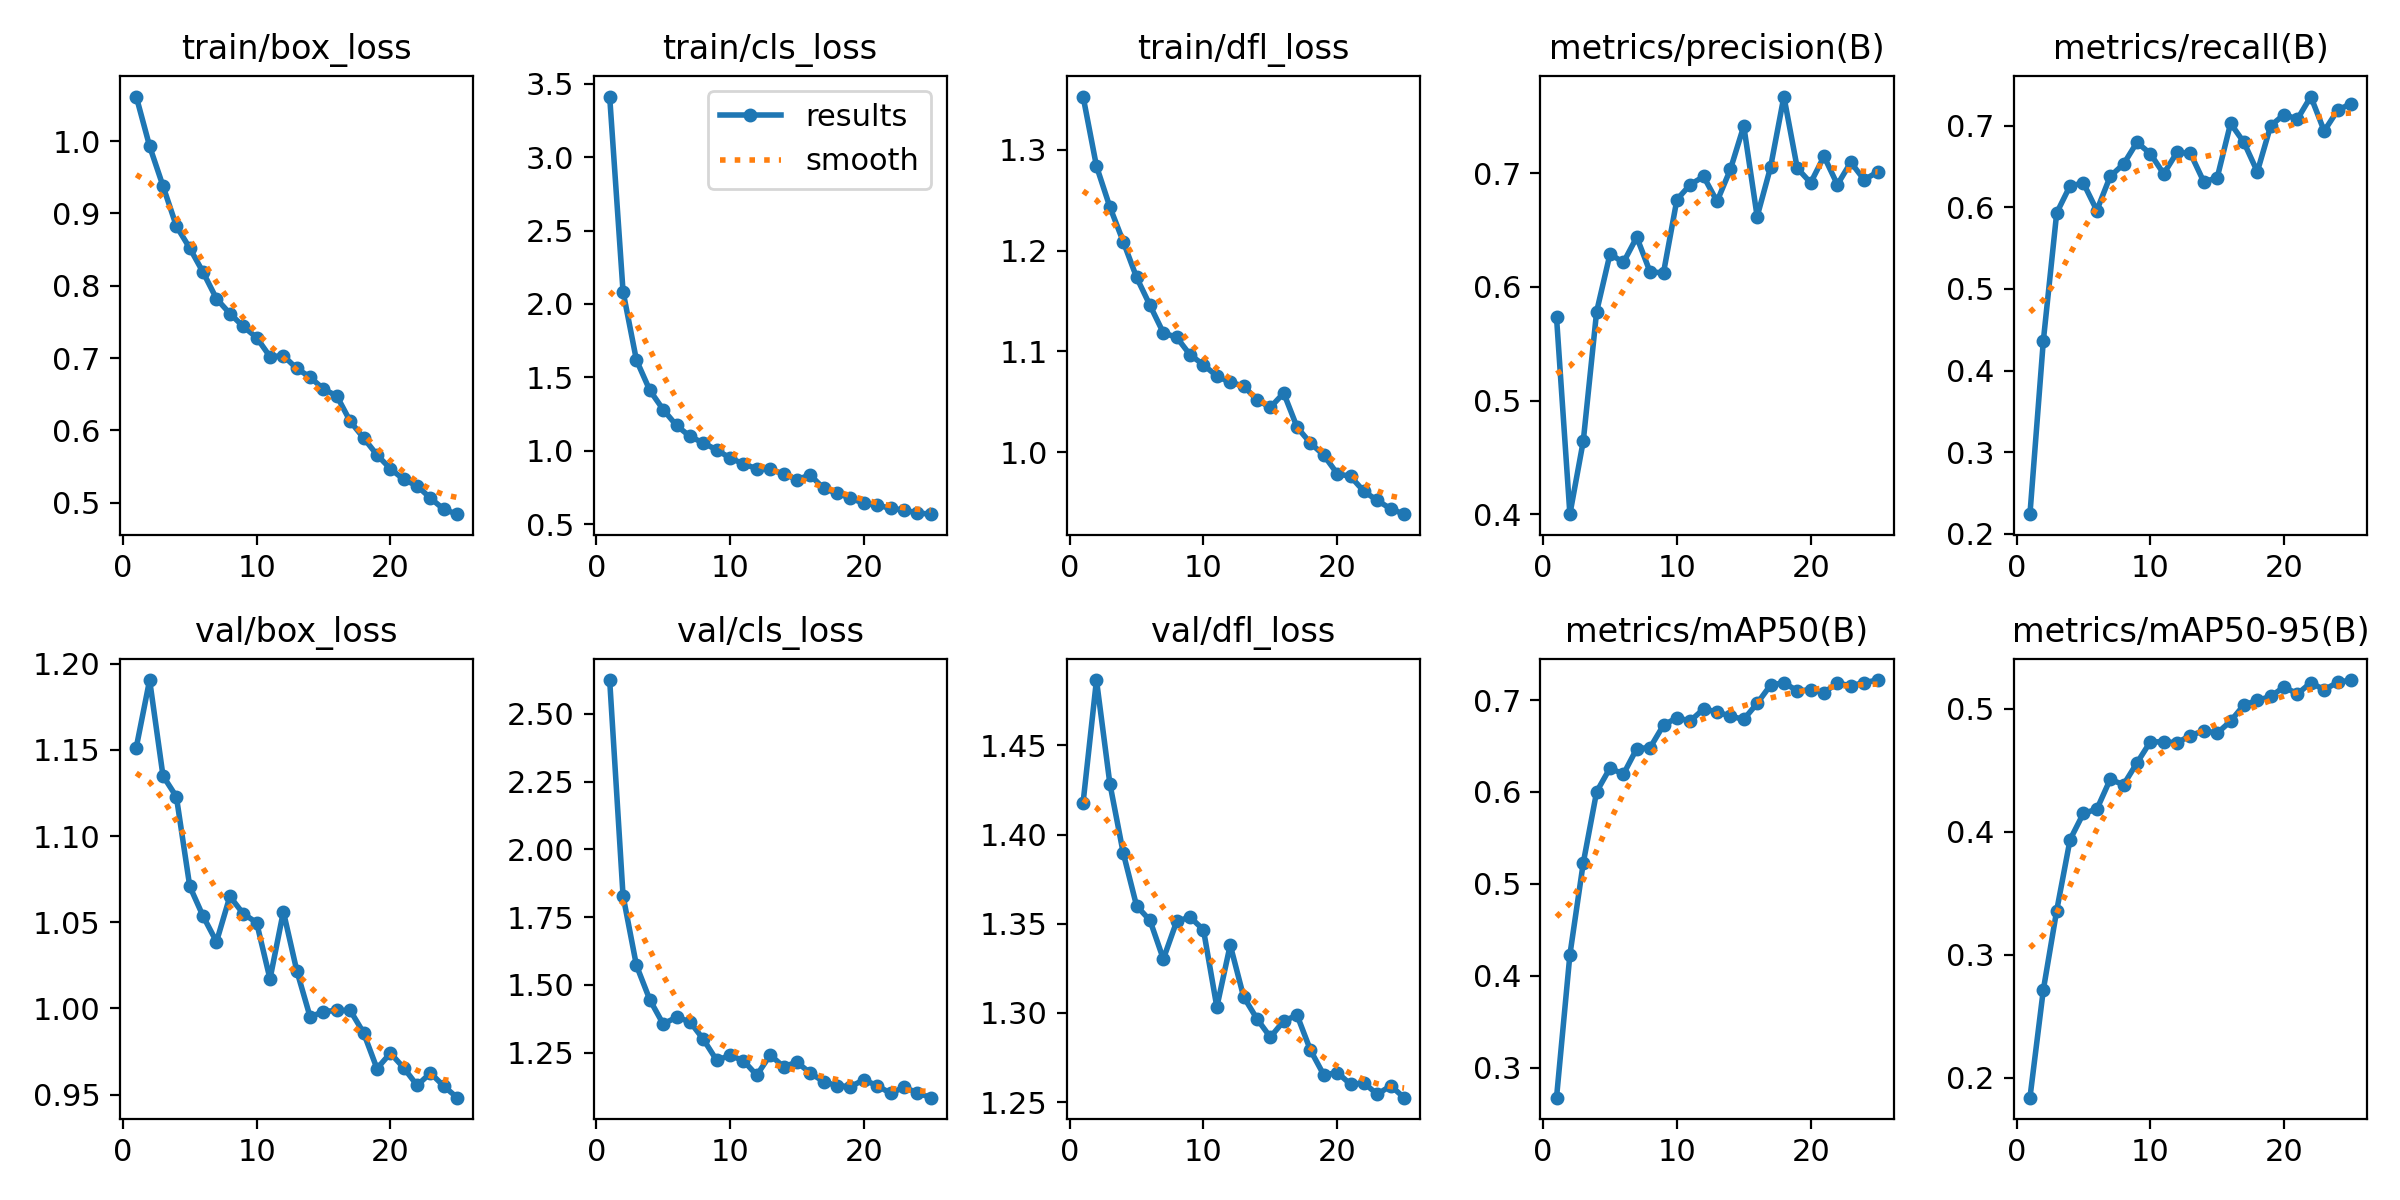

In [14]:
Image(filename='runs/detect/train2/results.png', width=1000)

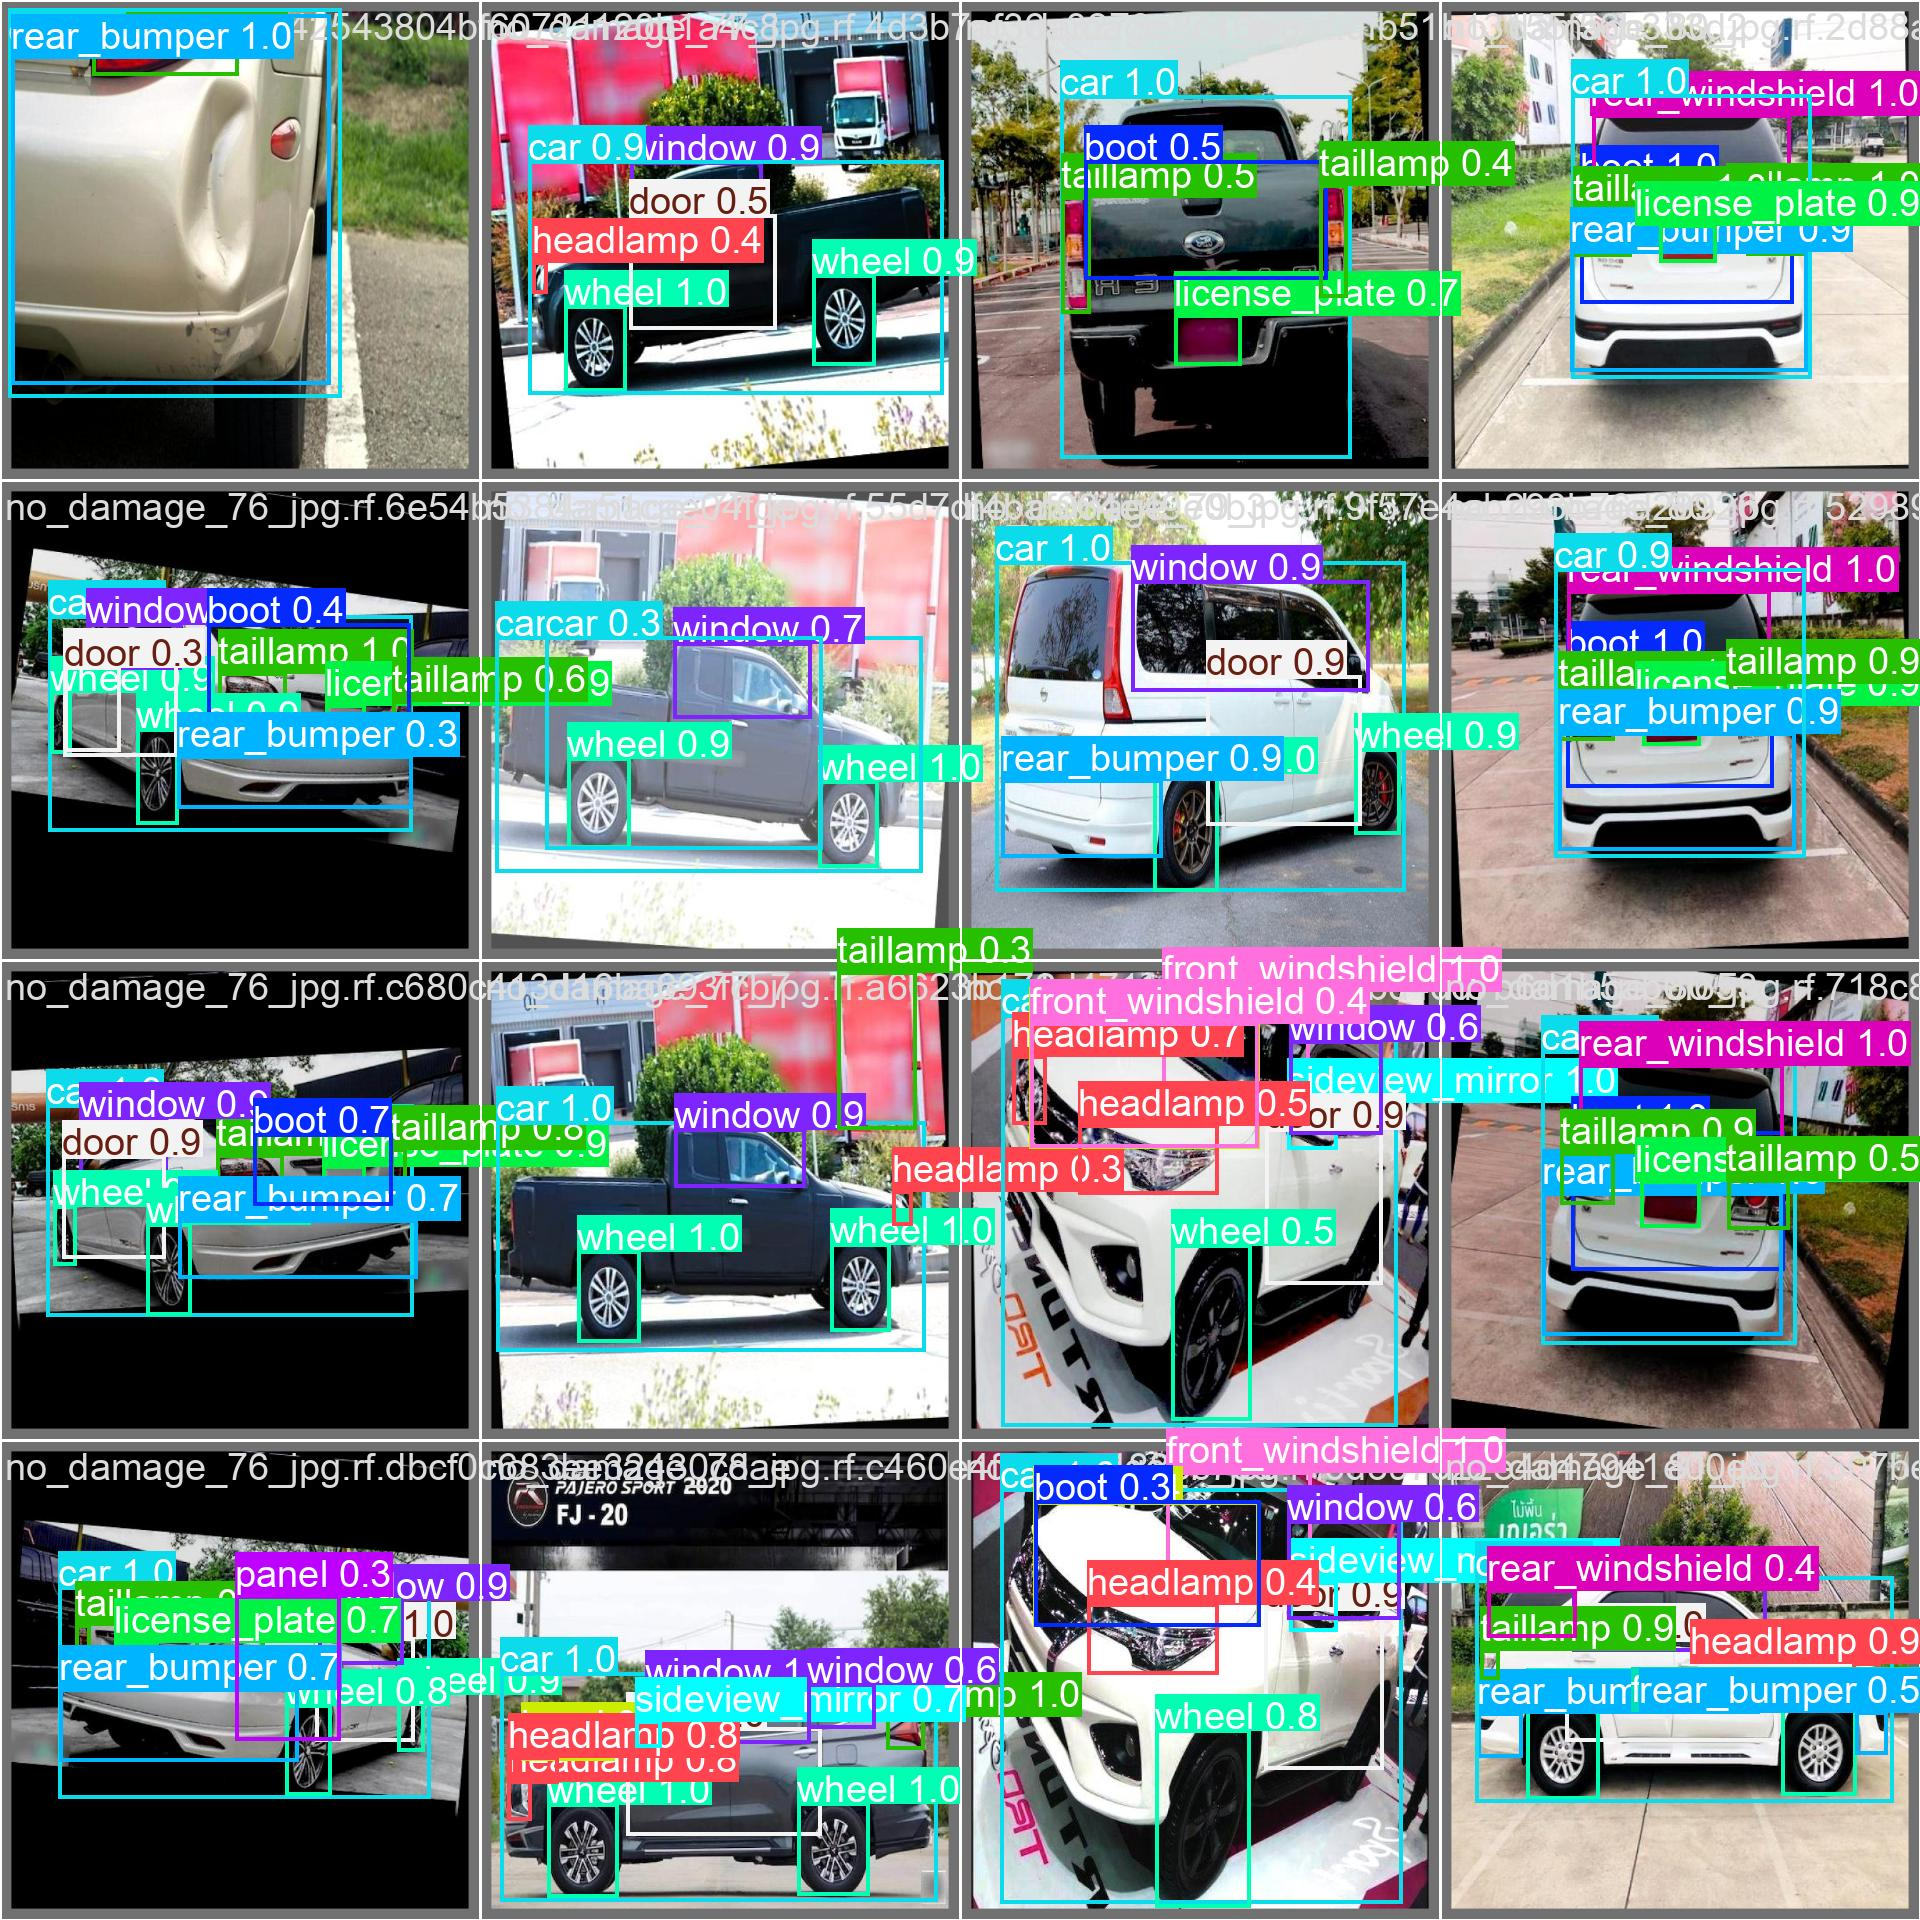

In [15]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=1000)

In [16]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008768 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/car/valid/labels.cache... 160 images, 1 backgrounds, 0 corrupt: 100% 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:11<00:00,  1.10s/it]
                   all        160       1055      0.701      0.727      0.722      0.523
                  boot         35         39      0.562       0.59      0.609      0.455
                   car        142        145      0.912      0.979       0.94      0.847
                  door         50         52      0.768      0.731      0.813      0.539
          front_bumper         30         30      0.506       0.41      0.469      0.312
           front_grill         49         51      0.655      0.671      0.655      0.557
      front_windshield         54         5

In [20]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008768 parameters, 0 gradients, 8.1 GFLOPs

image 1/22 /content/drive/MyDrive/car/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 car, 2 headlamps, 1 license_plate, 17.0ms
image 2/22 /content/drive/MyDrive/car/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 2 cars, 1 license_plate, 8.0ms
image 3/22 /content/drive/MyDrive/car/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 2 cars, 2 license_plates, 10.1ms
image 4/22 /content/drive/MyDrive/car/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 1 car, 2 front_grills, 2 headlamps, 1 license_plate, 1 taillamp, 1 wheel, 7.5ms
image 5/22 /content/drive/MyDrive/car/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 640x640 1 car, 1 front_grill, 1 front_windshield, 1 headlamp, 1 hood, 1 license_plate, 1 sideview_

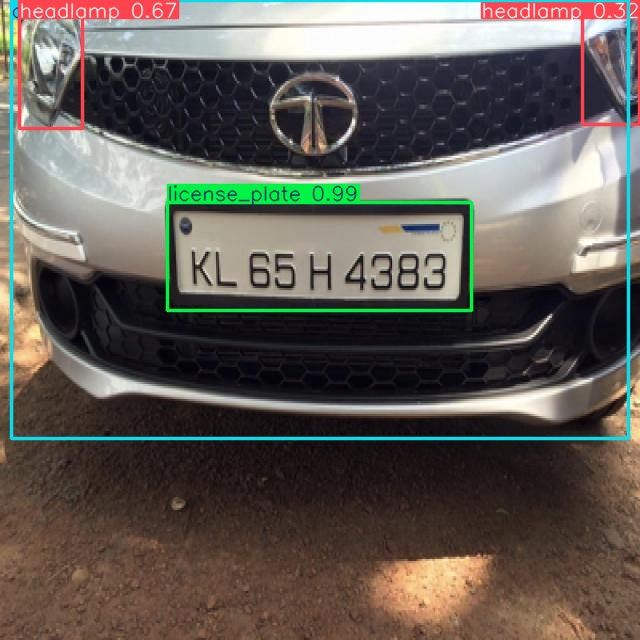

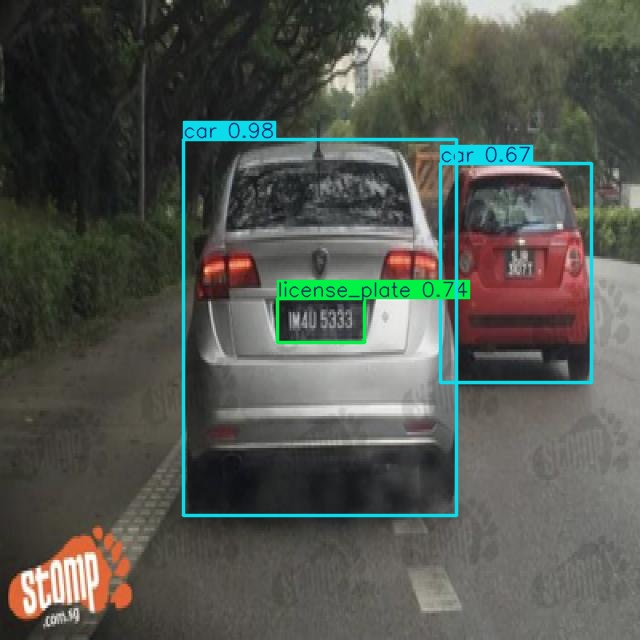

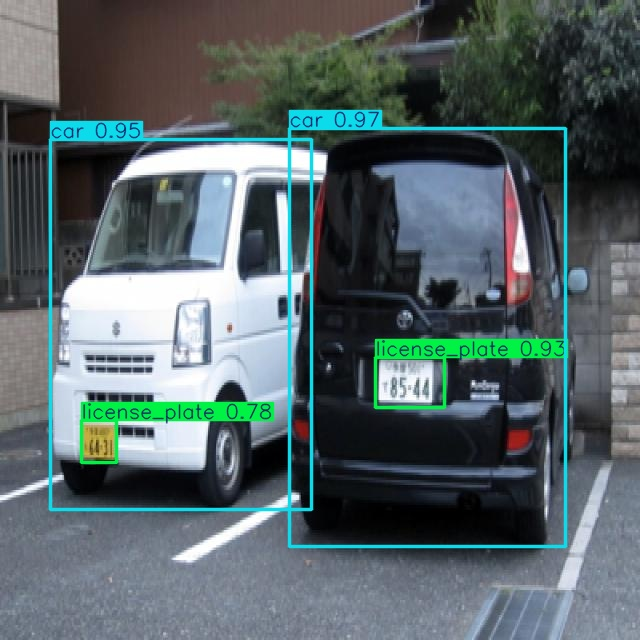

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")